In [2]:
%matplotlib inline

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Display the data
raw = Path("..", "Resources", "Life_Expectancy_UNData.csv")
raw_df = pd.read_csv(raw, low_memory=False) # low_memory to clarify datatypes due to error regarding multiple datatypes in a single column
# display(raw_df)

# Remove separator rows used for readability in the original csv file (only 4 such rows)
clean_df = raw_df[raw_df["Type"] != "Label/Separator"]
# display(clean_df)

# View all the columns names in preparation to select columns of interest in the next step
# print(clean_df.columns.tolist())

# Select only the columns you are interested in
abridged_df = clean_df[["Index", "Region, subregion, country or area *", "Type", "Year", "Male Life Expectancy at Birth (years)", "Female Life Expectancy at Birth (years)",
"Male Life Expectancy at Age 15 (years)", "Female Life Expectancy at Age 15 (years)", "Male Life Expectancy at Age 65 (years)", "Female Life Expectancy at Age 65 (years)", 
"Male Life Expectancy at Age 80 (years)", "Female Life Expectancy at Age 80 (years)"]]
# display(abridged_df)

# Remove any remaining rows which have "..." value, which was used in place of null within many columns
data_df = abridged_df[(abridged_df["Male Life Expectancy at Birth (years)"] != "...") | (abridged_df["Female Life Expectancy at Birth (years)"] != "...") | (abridged_df["Male Life Expectancy at Age 15 (years)"] != "...") | (abridged_df["Female Life Expectancy at Age 15 (years)"] != "...") | (abridged_df["Male Life Expectancy at Age 65 (years)"] != "...") | (abridged_df["Female Life Expectancy at Age 65 (years)"] != "...") | (abridged_df["Male Life Expectancy at Age 80 (years)"] != "...") | (abridged_df["Female Life Expectancy at Age 80 (years)"] != "...")]
# display(data_df)

In [4]:
# Find the difference between female and male life expectancy at different ages
data_df.loc[:, "Gap at Birth"] = data_df["Female Life Expectancy at Birth (years)"].astype(float) - data_df["Male Life Expectancy at Birth (years)"].astype(float)
data_df.loc[:, "Gap at Age 15"] = data_df["Female Life Expectancy at Age 15 (years)"].astype(float) - data_df["Male Life Expectancy at Age 15 (years)"].astype(float)
data_df.loc[:, "Gap at Age 65"] = data_df["Female Life Expectancy at Age 65 (years)"].astype(float) - data_df["Male Life Expectancy at Age 65 (years)"].astype(float)
data_df.loc[:, "Gap at Age 80"] = data_df["Female Life Expectancy at Age 80 (years)"].astype(float) - data_df["Male Life Expectancy at Age 80 (years)"].astype(float)
display(data_df)

C:\Users\rfqwx\AppData\Local\Temp\ipykernel_28348\1784991758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[:, "Gap at Birth"] = data_df["Female Life Expectancy at Birth (years)"].astype(float) - data_df["Male Life Expectancy at Birth (years)"].astype(float)
C:\Users\rfqwx\AppData\Local\Temp\ipykernel_28348\1784991758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[:, "Gap at Age 15"] = data_df["Female Life Expectancy at Age 15 (years)"].astype(float) - data_df["Male Life Ex

,Index,"Region, subregion, country or area *",Type,Year,Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Male Life Expectancy at Age 15 (years),Female Life Expectancy at Age 15 (years),Male Life Expectancy at Age 65 (years),Female Life Expectancy at Age 65 (years),Male Life Expectancy at Age 80 (years),Female Life Expectancy at Age 80 (years),Gap at Birth,Gap at Age 15,Gap at Age 65,Gap at Age 80
0,1,WORLD,World,1950.0,44.6,48.4,44.8,49.4,10.5,12,4.7,5.2,3.8,4.6,1.5,0.5
1,2,WORLD,World,1951.0,45.4,49,45.5,49.6,10.5,12.1,4.7,5.2,3.6,4.1,1.6,0.5
2,3,WORLD,World,1952.0,46.6,49.9,46.4,50.2,10.7,12.3,4.8,5.4,3.3,3.8,1.6,0.6
3,4,WORLD,World,1953.0,47.2,50.4,46.8,50.4,10.8,12.4,4.8,5.4,3.2,3.6,1.6,0.6
4,5,WORLD,World,1954.0,48,51.2,47.3,50.9,10.9,12.6,4.9,5.5,3.2,3.6,1.7,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,20592,Wallis and Futuna Islands,Country/Area,2017.0,77.1,78,62.9,64.7,16.6,18.5,7.8,8.8,0.9,1.8,1.9,1.0
20592,20593,Wallis and Futuna Islands,Country/Area,2018.0,76.4,79.5,62.3,66,16.2,19.4,7.6,9.4,3.1,3.7,3.2,1.8
20593,20594,Wallis and Futuna Islands,Country/Area,2019.0,78.6,80.6,64.4,67,17.6,20.1,8.4,9.8,2.0,2.6,2.5,1.4
20594,20595,Wallis and Futuna Islands,Country/Area,2020.0,77.7,79.8,63.5,66.3,17,19.6,8.1,9.5,2.1,2.8,2.6,1.4


['Burundi' 'Comoros' 'Djibouti' 'Eritrea' 'Ethiopia' 'Kenya' 'Madagascar'
 'Malawi' 'Mauritius' 'Mayotte' 'Mozambique' 'Réunion' 'Rwanda'
 'Seychelles' 'Somalia' 'South Sudan' 'Uganda'
 'United Republic of Tanzania' 'Zambia' 'Zimbabwe' 'Angola' 'Cameroon'
 'Central African Republic' 'Chad' 'Congo'
 'Democratic Republic of the Congo' 'Equatorial Guinea' 'Gabon'
 'Sao Tome and Principe' 'Algeria' 'Egypt' 'Libya' 'Morocco' 'Sudan'
 'Tunisia' 'Western Sahara' 'Botswana' 'Eswatini' 'Lesotho' 'Namibia'
 'South Africa' 'Benin' 'Burkina Faso' 'Cabo Verde' "Côte d'Ivoire"
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Liberia' 'Mali' 'Mauritania'
 'Niger' 'Nigeria' 'Saint Helena' 'Senegal' 'Sierra Leone' 'Togo'
 'Kazakhstan' 'Kyrgyzstan' 'Tajikistan' 'Turkmenistan' 'Uzbekistan'
 'China' 'China, Hong Kong SAR' 'China, Macao SAR'
 'China, Taiwan Province of China' "Dem. People's Republic of Korea"
 'Japan' 'Mongolia' 'Republic of Korea' 'Afghanistan' 'Bangladesh'
 'Bhutan' 'India' 'Iran (Islamic Rep

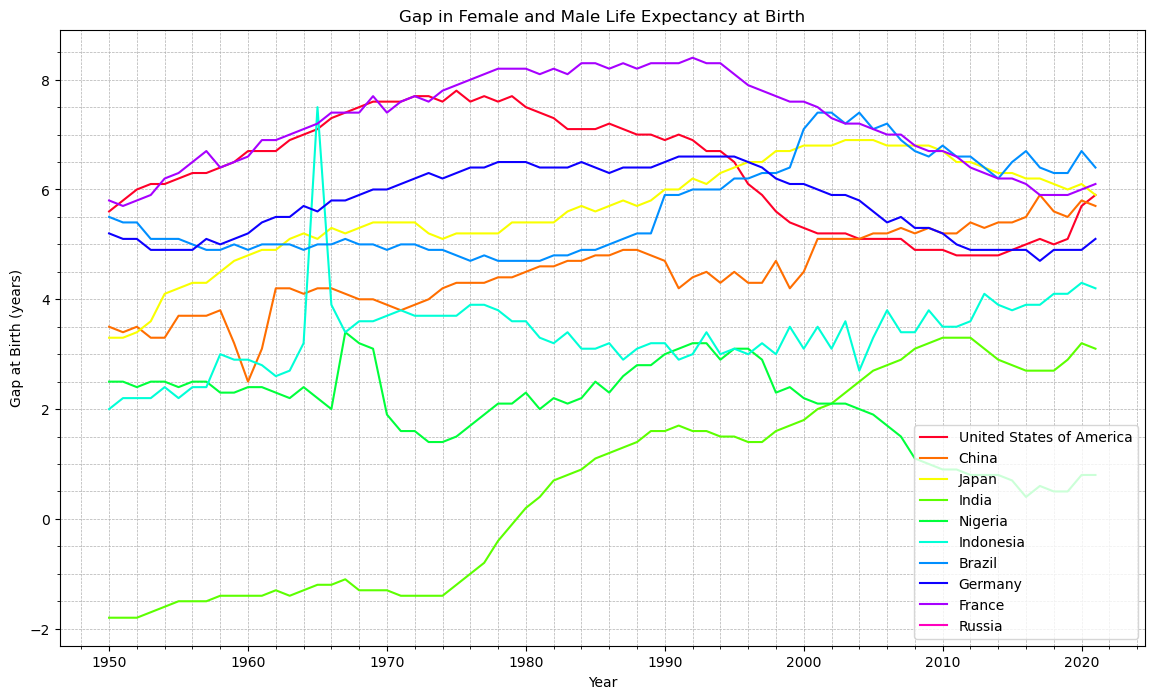

In [5]:
# PLot change over time of the gap in life expectancy at birth for selected countries

# List countries
countries = data_df.loc[data_df["Type"] == "Country/Area", ["Region, subregion, country or area *"]]
print(countries["Region, subregion, country or area *"].unique())

# Select some countries (in this case, ones with relatively large populations)
selected_countries = ["United States of America", "China", "Japan", "India", "Nigeria", "Indonesia", "Brazil", "Germany", "France", "Russia"]

# Use matplotlib colormap to assign different color to each line plot
colors = plt.cm.gist_rainbow(np.linspace(0, 1, len(selected_countries)))

# Plot
plt.figure(figsize=(14, 8))

for (country, color) in zip(selected_countries, colors):
    x_axis = data_df.loc[data_df["Region, subregion, country or area *"] == country, "Year"]
    y_axis = data_df.loc[data_df["Region, subregion, country or area *"] == country, "Gap at Birth"]
    plt.plot(x_axis, y_axis, label = country, color = color)
    
plt.title("Gap in Female and Male Life Expectancy at Birth")
plt.xlabel("Year")
plt.ylabel("Gap at Birth (years)")
plt.legend(loc="lower right")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

plt.savefig("le_gap_over_time_selected_countries.png")
plt.show()

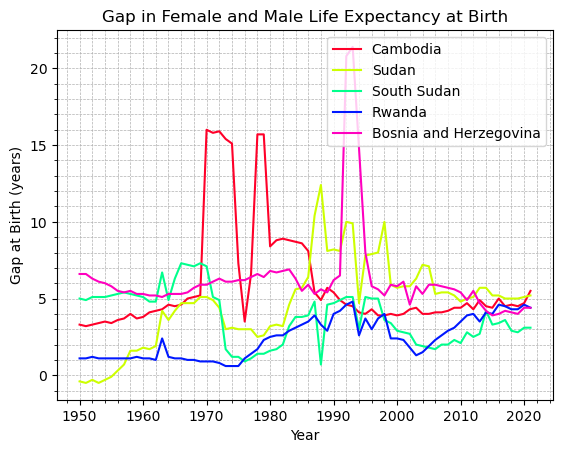

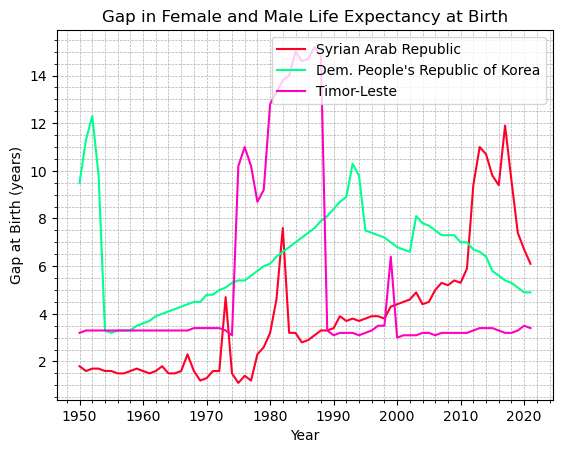

In [6]:
# Investigate change in life expectancy gap for countries that suffered a genocide or mass death event (famine, civil war, etc.)
selected_countries_1 = ["Cambodia", "Sudan", "South Sudan", "Rwanda", "Bosnia and Herzegovina"]
selected_countries_2 = ["Syrian Arab Republic", "Dem. People's Republic of Korea", "Timor-Leste"]


# Use matplotlib colormap to assign different color to each line plot
colors1 = plt.cm.gist_rainbow(np.linspace(0, 1, len(selected_countries_1)))
colors2 = plt.cm.gist_rainbow(np.linspace(0, 1, len(selected_countries_2)))

for (country, color) in zip(selected_countries_1, colors1):
    x_axis = data_df.loc[data_df["Region, subregion, country or area *"] == country, "Year"]
    y_axis = data_df.loc[data_df["Region, subregion, country or area *"] == country, "Gap at Birth"]
    plt.plot(x_axis, y_axis, label = country, color = color)
plt.title("Gap in Female and Male Life Expectancy at Birth")
plt.xlabel("Year")
plt.ylabel("Gap at Birth (years)")
plt.legend(loc="upper right")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.savefig("le_gap_over_time_genocide1.png")
plt.show()

for (country, color) in zip(selected_countries_2, colors2):
    x_axis = data_df.loc[data_df["Region, subregion, country or area *"] == country, "Year"]
    y_axis = data_df.loc[data_df["Region, subregion, country or area *"] == country, "Gap at Birth"]
    plt.plot(x_axis, y_axis, label = country, color = color)   
plt.title("Gap in Female and Male Life Expectancy at Birth")
plt.xlabel("Year")
plt.ylabel("Gap at Birth (years)")
plt.legend(loc="upper right")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.savefig("le_gap_over_time_genocide2.png")
plt.show()